In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import cv2
import os
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

https://www.kaggle.com/code/aathikm/coffebean-multi-label-classification

In [18]:
#Code by Nghi Huynh https://www.kaggle.com/code/nghihuynh/quick-eda-it-s-corn-season

TRAIN_PATH = 'C:/archive/annotations.csv'
#TEST_PATH = '../input/kaggle-pog-series-s01e03/corn/test.csv'
train_df = pd.read_csv(TRAIN_PATH).set_index('y_max')
#test_df = pd.read_csv(TEST_PATH).set_index('seed_id')

In [19]:
train_df.head()

image_name  x_min  y_min  \
y_max                                                                     
294    000000_jpg.rf.beffaf3b548106ccf1da5dc629bc9504.jpg     75    278   
56     000000_jpg.rf.beffaf3b548106ccf1da5dc629bc9504.jpg    155     31   
2074   000000_JPG.rf.d3371cb3d63a59c5ba6730368b7905af.jpg    840   1122   
246    000000_jpg.rf.e662cb85f63817325956fea222d0990f.jpg     78     97   
1432   000000_jpg.rf.ee75fdf06813399a8376c6ff7056423a.jpg    687   1213   

       x_max class_name  
y_max                    
294      130      metal  
56       181      metal  
2074    1568    plastic  
246      352    plastic  
1432     904    plastic

In [20]:
train_df["class_name"].value_counts()

plastic    191
metal      118
paper      116
glass       44
Name: class_name, dtype: int64

In [26]:
#Code by Nghi Huynh https://www.kaggle.com/code/nghihuynh/quick-eda-it-s-corn-season

def visualize_trash(df, category):
    PATH = 'C:/archive/Images'
    imgs = []
    ids = []
    x_min = []
    count = 0
    
    for i, row in train_df.iterrows():
        if count == 15: break
        if row['class_name'] == category:
            imgs.append(row['image_name'])
            ids.append(i)
            x_min.append(row['x_min'])
            count += 1
    sns.set_style('white')
    n_rows = 3
    n_cols = 5
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,10), constrained_layout=True)
    fig.suptitle(f'Category: {category}', weight="bold", size=16)
    for i in range(3):
        for j in range(5):
            img = cv2.imread(os.path.join(PATH, imgs[i*n_cols+j]))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 
            axs[i][j].imshow(img)
            axs[i][j].set_title(f'Image Name : {ids[i*n_cols+j]}\n x_min: {x_min[i*n_cols+j]}')
    plt.show()

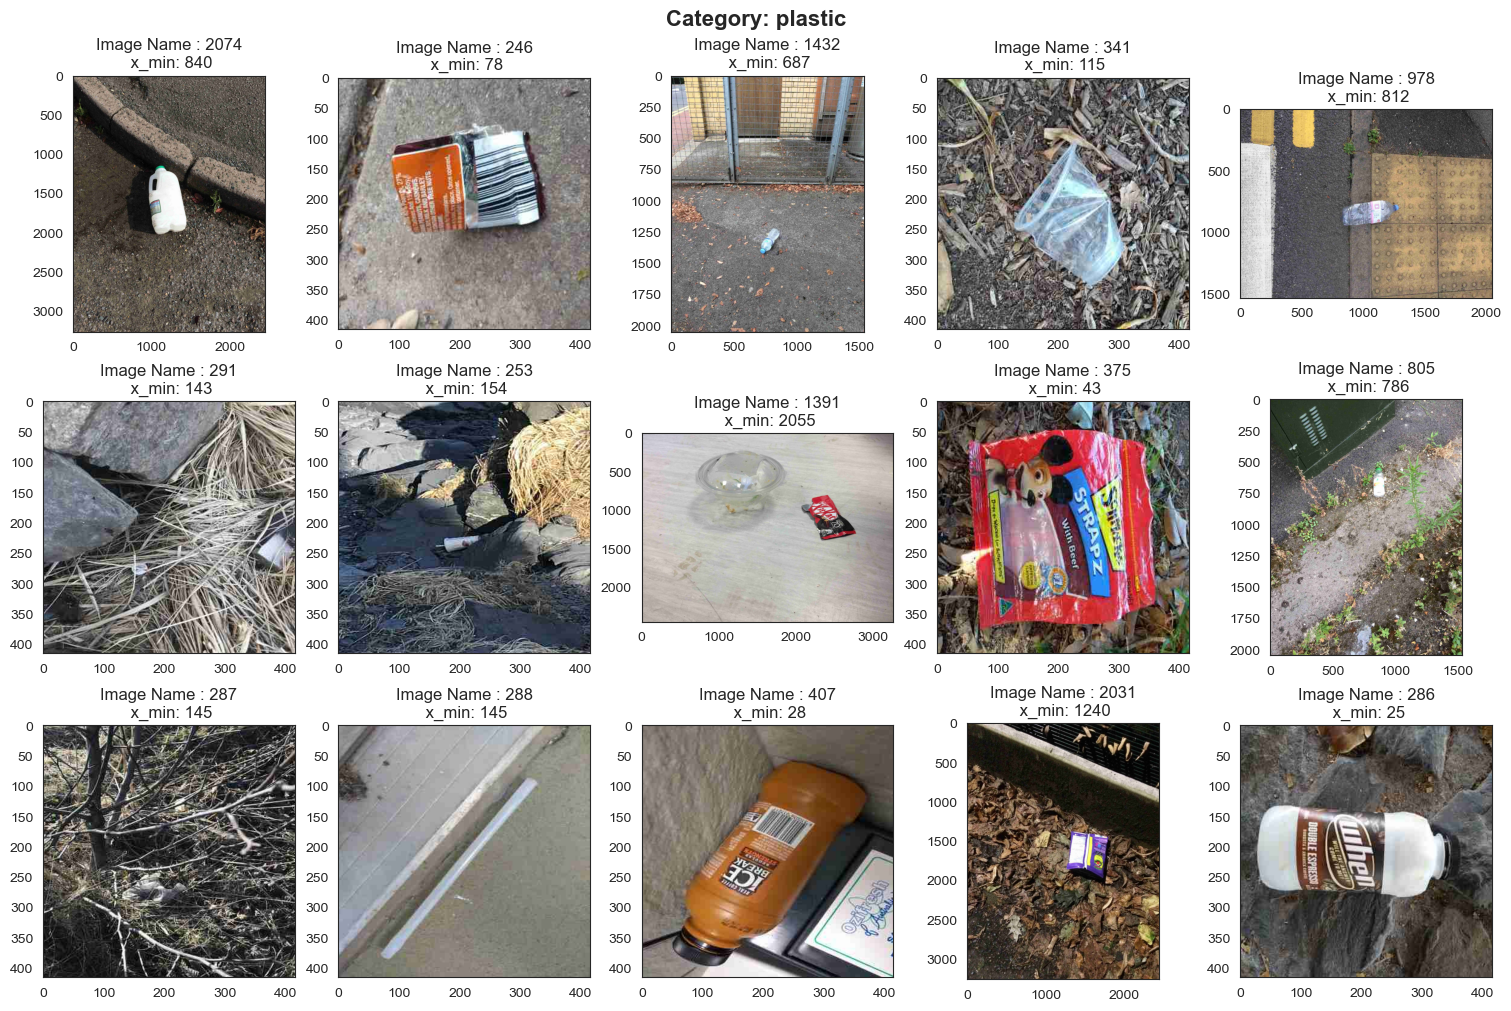

In [27]:
#Code by Nghi Huynh https://www.kaggle.com/code/nghihuynh/quick-eda-it-s-corn-season

visualize_trash(train_df, 'plastic')

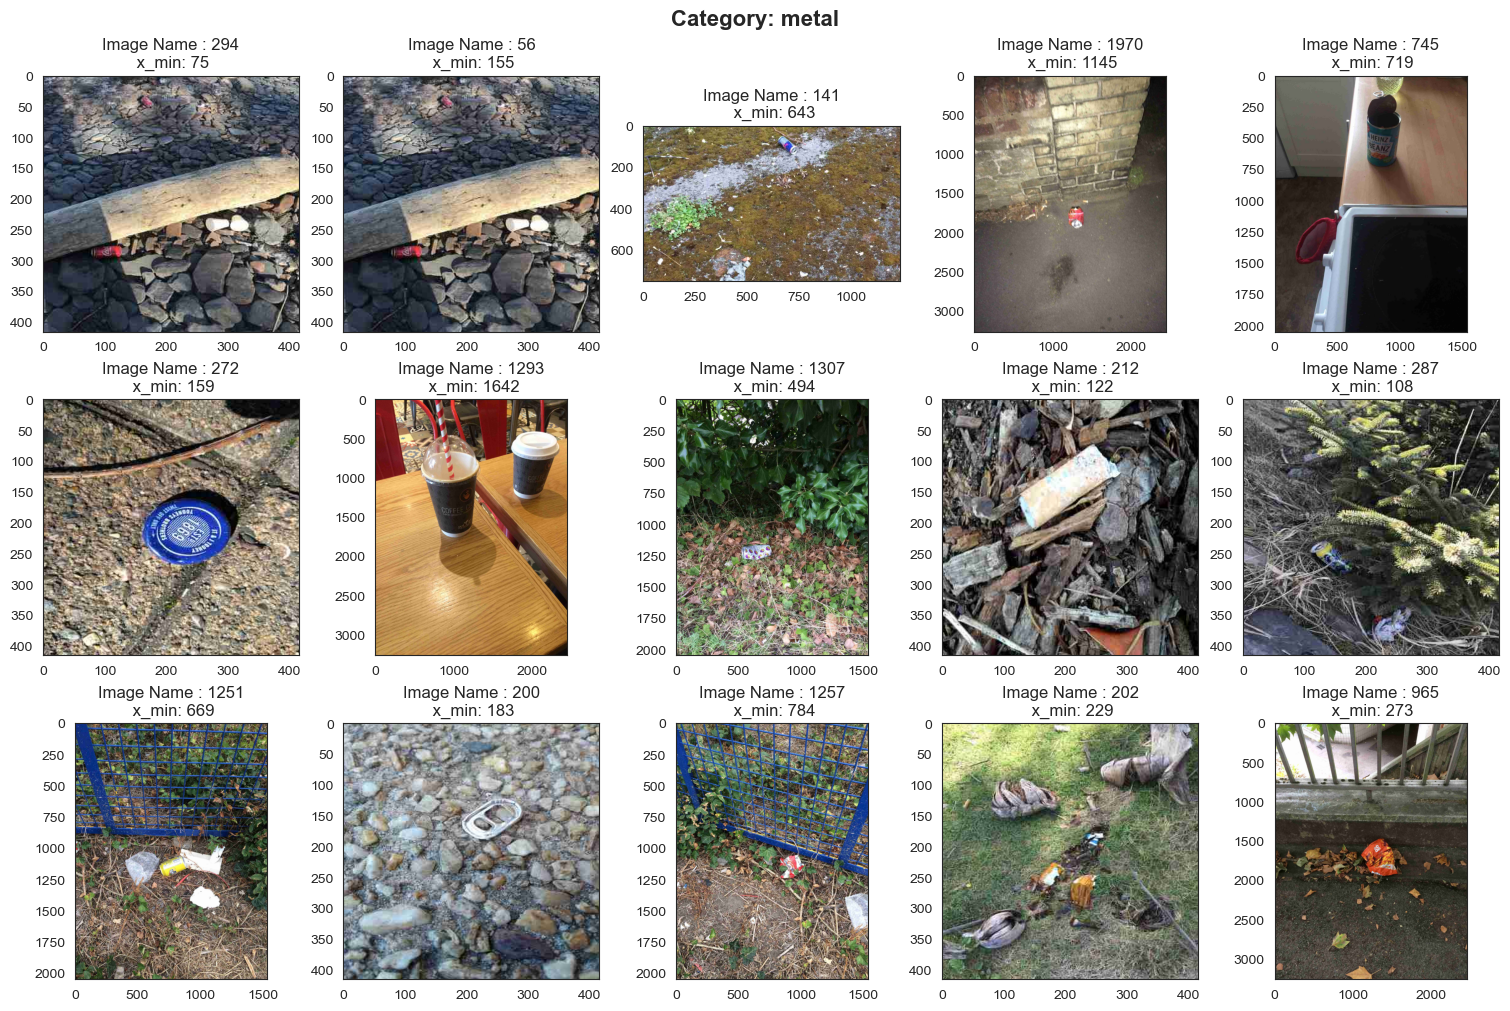

In [28]:
visualize_trash(train_df, 'metal')

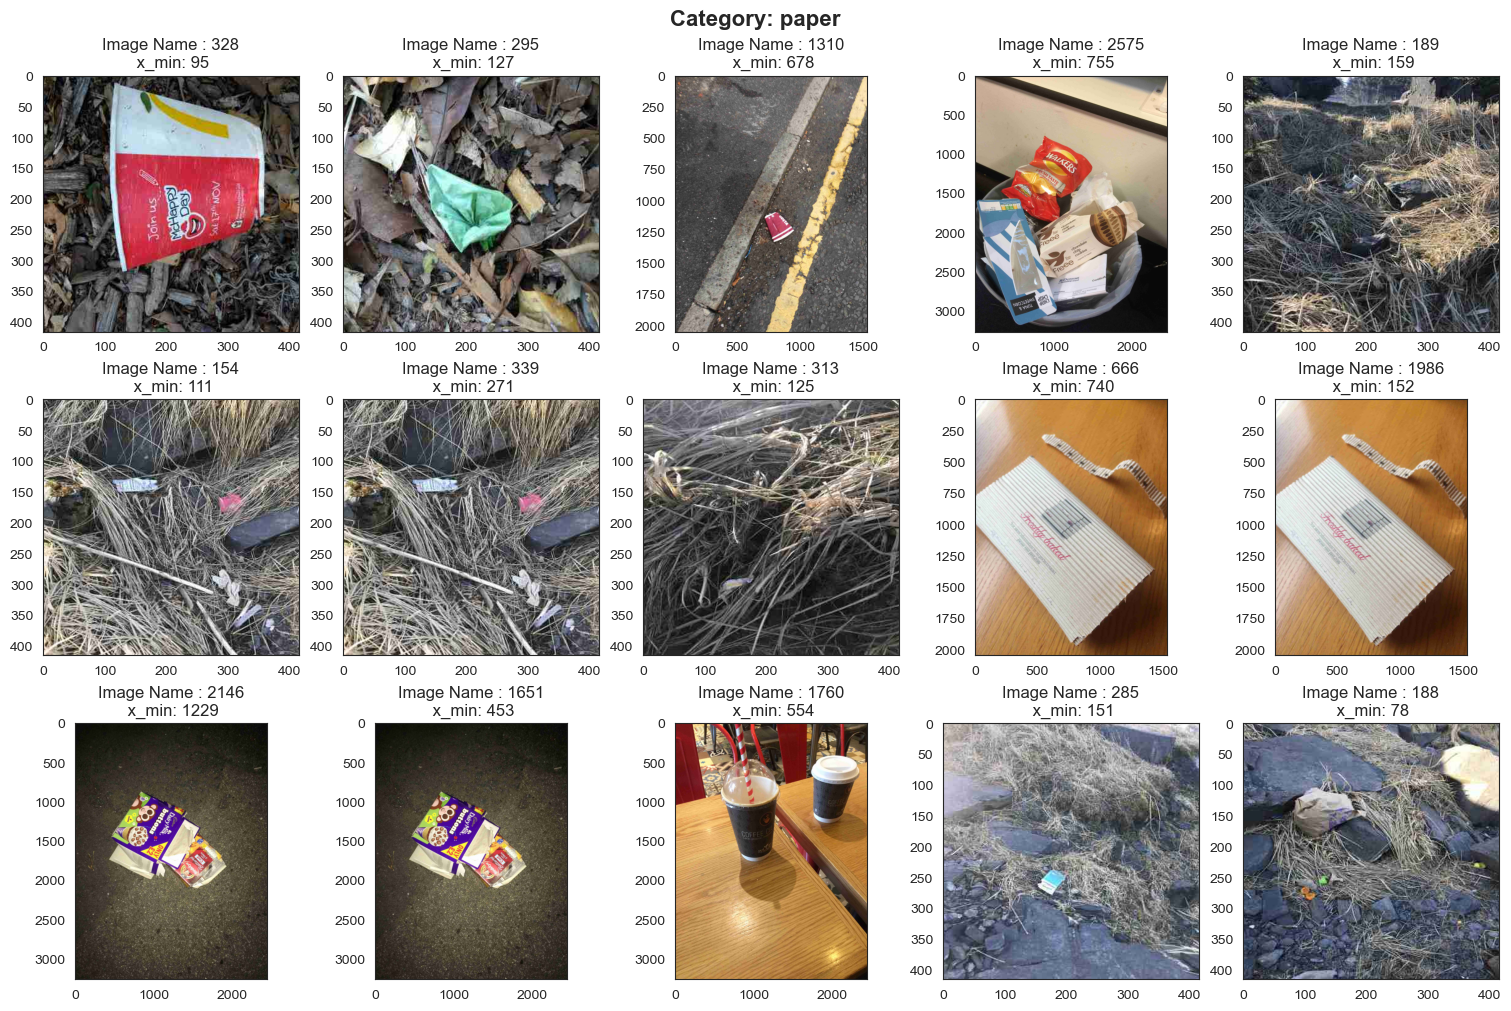

In [29]:
visualize_trash(train_df, 'paper')

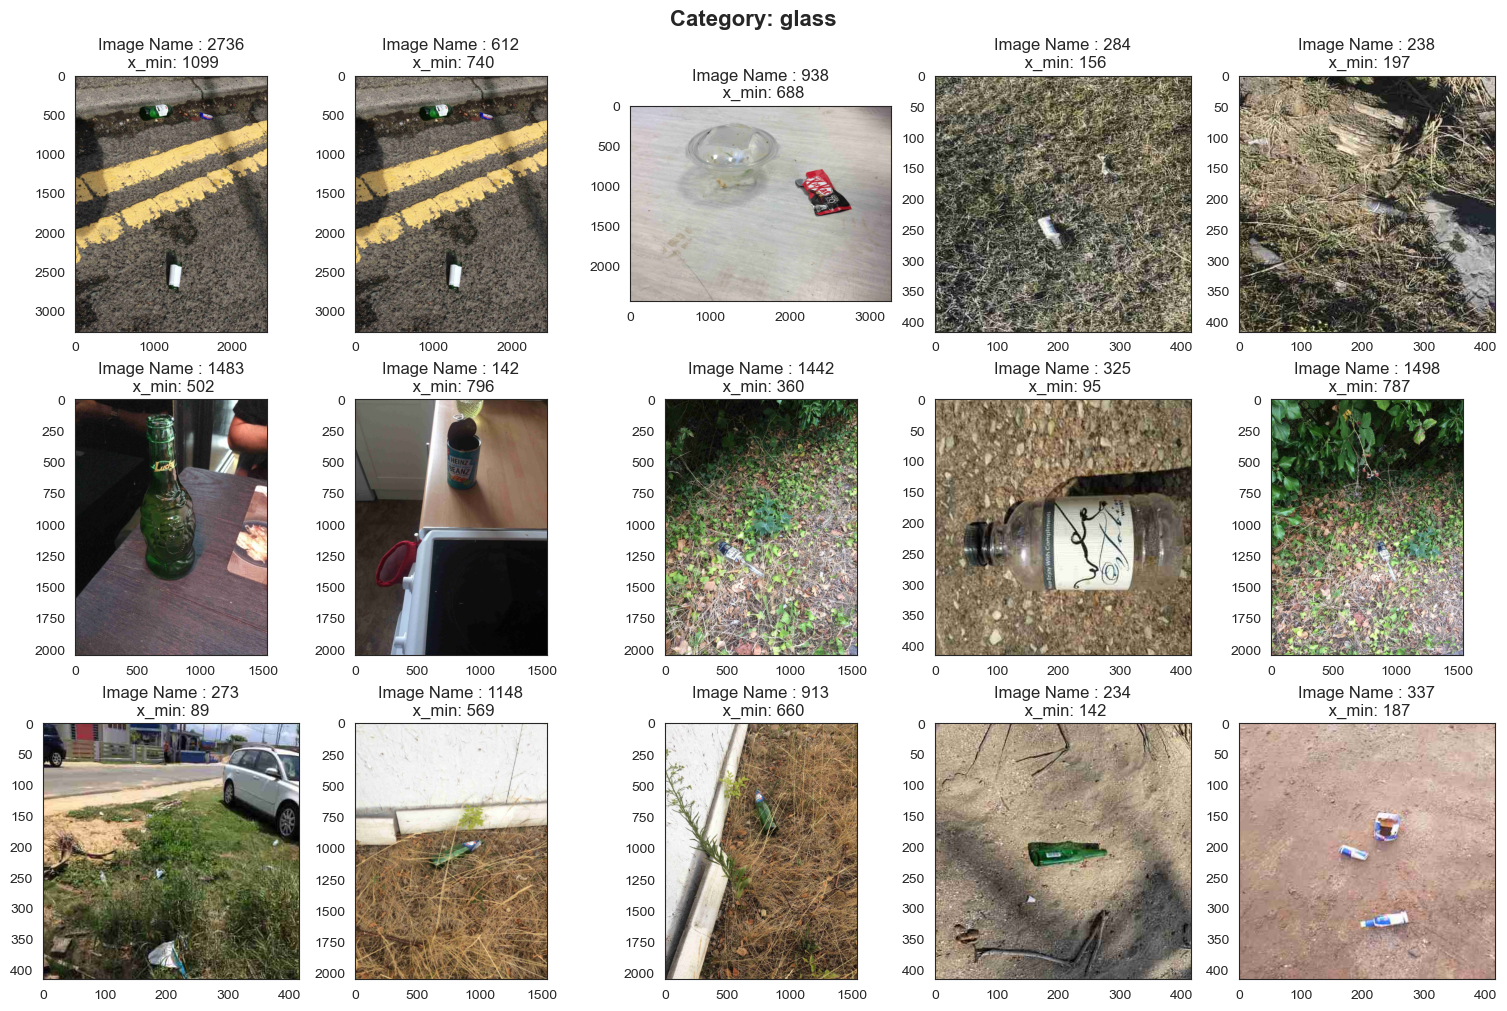

In [30]:
visualize_trash(train_df, 'glass')

#Another Way

In [3]:
! pip install -Uqq timm

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


Error processing line 1 of C:\Users\rlaco\anaconda3\lib\site-packages\vision-1.0.0-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\rlaco\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [2]:
#Code by Apsal S Kalathukunnel https://www.kaggle.com/code/apzlll/corn-fastai-baseline/notebook

import numpy as np # linear algebra
import pandas as pd 

import timm
from pathlib import Path
from fastai.vision.all import *
from fastai.vision.all import vision_learner, get_image_files

In [15]:
!ls ../input/aquatrash

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


#File name 0 (1st jpg/image file)

In [16]:
#Code by Apsal S Kalathukunnel https://www.kaggle.com/code/apzlll/corn-fastai-baseline/notebook

path = Path('../input/aquatrash')
fname = (path/"Images").ls()
print(fname[0])

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '..\\input\\aquatrash\\Images'

In [48]:
#Code by Apsal S Kalathukunnel https://www.kaggle.com/code/apzlll/corn-fastai-baseline/notebook

train_df = pd.read_csv(path/"annotations.csv")
#test_df = pd.read_csv(path/"test.csv")

In [49]:
#Code by Apsal S Kalathukunnel https://www.kaggle.com/code/apzlll/corn-fastai-baseline/notebook

dls = ImageDataLoaders.from_df(train_df,
                               path=path,
                               seed=34,
                               label_col=3,
                               fn_col=2,
                               item_tfms=[Resize(224)],
                               batch_tfms = aug_transforms(size = 224, min_scale = 0.75)
                              )
dls.show_batch()

FileNotFoundError: [Errno 2] No such file or directory: '../input/aquatrash/531'

In [50]:
dls.show_batch(unique=True)

NameError: name 'dls' is not defined

#I don't know how to fix the line above. Any Clue?

#Acknowldgements:

Nghi Huynh https://www.kaggle.com/code/nghihuynh/quick-eda-it-s-corn-season

Apsal S Kalathukunnel https://www.kaggle.com/code/apzlll/corn-fastai-baseline/notebook